In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
df = pd.read_csv('iris.data',header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info

<bound method DataFrame.info of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

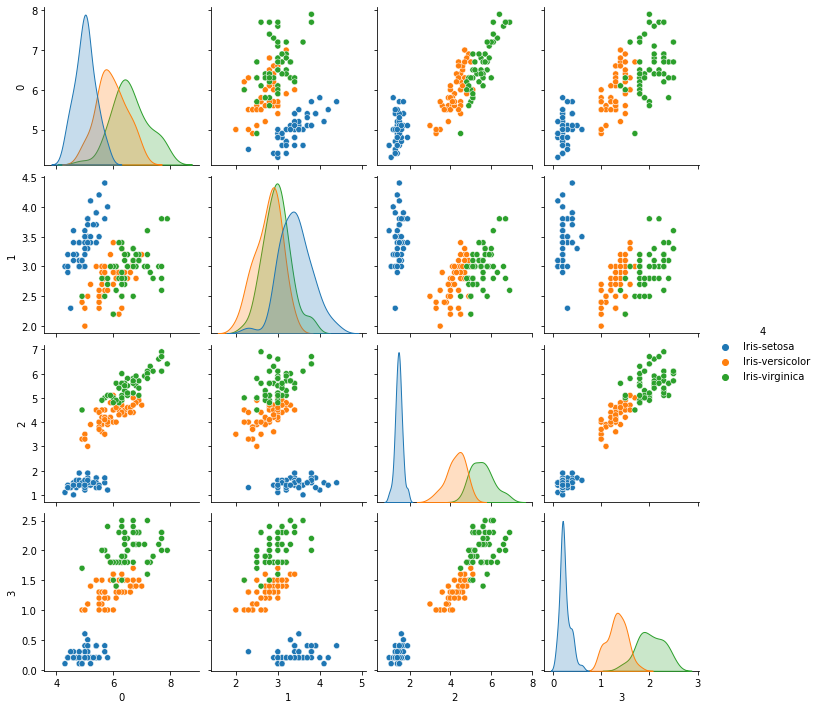

In [ ]:
sns.pairplot(df,hue= 4)

In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
x = df[[0, 1, 2, 3]]

In [ ]:
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df[4]

In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object

In [ ]:
enc = OneHotEncoder()

In [ ]:
y_encoded = enc.fit_transform(y[:, np.newaxis]).toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encoded,test_size=0.2)

In [ ]:
model=Sequential()
model.add(Dense(4,input_dim=4,activation='relu',name='Input'))
model.add(Dense(4,input_dim=4,activation='relu',name='Hidden_1'))
model.add(Dense(3,input_dim=4,activation='softmax',name='Output'))
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 4)                 20        
_________________________________________________________________
Hidden_1 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output (Dense)               (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train,y_train,verbose=2,batch_size=5,epochs=1000)

Epoch 1/1000
24/24 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 2/1000
24/24 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 3/1000
24/24 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 4/1000
24/24 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 5/1000
24/24 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 6/1000
24/24 - 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 7/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 8/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 9/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 10/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 11/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 12/1000
24/24 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 13/1000
24/24 - 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 14/1000
24/24 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 15/1000
24/24 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 16/1000
24/24 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 17/1000
24/24 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 

In [ ]:
results=model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.9238 - accuracy: 0.9333
